In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_edited = pd.read_csv('./data/clean_df_final.csv', index_col=0 )

F:\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7,8,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Reset Display or Max Display setting here

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#TO SEE EVERYTHING

In [4]:
pd.reset_option('all')
#RUN THIS WHEN DONE SEEING EVERYTHING PLS


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



F:\Anaconda\envs\learn-env\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


# Creating new DF of only post 1985

In [5]:
df_edited2 = df_edited[df_edited['year']>2010].copy()

# Fatality Cleaning

In [6]:
df_edited2['total_pop'] = (df_edited2['Total.Fatal.Injuries'] + df_edited2['Total.Minor.Injuries'] + df_edited2['Total.Serious.Injuries'] + df_edited2['Total.Uninjured'])

#Creating total_pop col

In [7]:
#GROUP BY ENGINE AND MAKE

In [8]:
sum_engine_make = df_edited2.groupby(['Make', 'Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [9]:
sum_engine_make['fatality_perc'] = (sum_engine_make['Total.Fatal.Injuries']/sum_engine_make['total_pop']) * 100
sum_engine_make['injury_perc'] = ((sum_engine_make['Total.Serious.Injuries']+sum_engine_make['Total.Minor.Injuries'])/sum_engine_make['total_pop']) * 100
sum_engine_make['uninjured_perc'] = (sum_engine_make['Total.Uninjured']/sum_engine_make['total_pop']) * 100
sum_engine_make.reset_index(inplace = True)

In [10]:
#GROUP BY MAKE

In [11]:
sum_make = df_edited2.groupby(['Make']).sum().sort_values(by='total_pop', ascending = False)

In [12]:
sum_make['fatality_perc'] = (sum_make['Total.Fatal.Injuries']/sum_make['total_pop']) * 100
sum_make['injury_perc'] = ((sum_make['Total.Serious.Injuries']+sum_make['Total.Minor.Injuries'])/sum_make['total_pop']) * 100
sum_make['uninjured_perc'] = (sum_make['Total.Uninjured']/sum_make['total_pop']) * 100
sum_make.reset_index(inplace = True)

In [13]:
#GROUP BY ENGINE NUM
sum_engine = df_edited2.groupby(['Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [14]:
sum_engine['fatality_perc'] = (sum_engine['Total.Fatal.Injuries']/sum_engine['total_pop']) * 100
sum_engine['injury_perc'] = ((sum_engine['Total.Serious.Injuries']+sum_engine['Total.Minor.Injuries'])/sum_engine['total_pop']) * 100
sum_engine['uninjured_perc'] = (sum_engine['Total.Uninjured']/sum_engine['total_pop']) * 100
sum_engine.reset_index(inplace = True)

# Fatality Analyzing

In [15]:
new_sum_engine = sum_engine[sum_engine['counter'] >= 75]
new_sum_engine

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
0,2.0,1466.0,916.0,499.0,54786.0,4239798,2103,57667.0,2.542182,2.453743,95.004075
1,-99.0,4873.0,960.0,717.0,45604.0,6546690,3245,52154.0,9.343483,3.215477,87.441040
2,1.0,4328.0,3657.0,2443.0,13784.0,27996212,13886,24212.0,17.875434,25.194119,56.930448
4,0.0,38.0,66.0,79.0,341.0,423324,210,524.0,7.251908,27.671756,65.076336


In [16]:
new_sum_engine.drop([1], axis = 0, inplace = True)

F:\Anaconda\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
new_sum_engine.sort_values(by = 'uninjured_perc', ascending = False)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
0,2.0,1466.0,916.0,499.0,54786.0,4239798,2103,57667.0,2.542182,2.453743,95.004075
4,0.0,38.0,66.0,79.0,341.0,423324,210,524.0,7.251908,27.671756,65.076336
2,1.0,4328.0,3657.0,2443.0,13784.0,27996212,13886,24212.0,17.875434,25.194119,56.930448


In [18]:
##CONCLUSION: 3 4 and 2 are safest
## 0 and 1 are not safest

In [19]:
new_sum_engine_make = sum_engine_make[sum_engine_make['counter'] >= 75]

In [20]:
new_sum_engine_make = new_sum_engine_make[new_sum_engine_make['Number.of.Engines']!= -99]

In [21]:
new_sum_engine_make.sort_values(by = 'uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
2,Airbus,2.0,2.0,106.0,30.0,12064.0,256169,127,12202.0,0.016391,1.114571,98.869038
1,Boeing,2.0,148.0,432.0,153.0,31590.0,645080,320,32323.0,0.457878,1.809857,97.732265
45,Maule,1.0,11.0,25.0,7.0,133.0,233875,116,176.0,6.250000,18.181818,75.568182
47,Stinson,1.0,4.0,39.0,13.0,110.0,191559,95,166.0,2.409639,31.325301,66.265060
3,Cessna,1.0,976.0,973.0,528.0,4621.0,7621290,3780,7098.0,13.750352,21.146802,65.102846
39,Champion,1.0,29.0,31.0,18.0,135.0,278306,138,213.0,13.615023,23.004695,63.380282
18,Beech,2.0,217.0,74.0,55.0,595.0,653143,324,941.0,23.060574,13.708820,63.230606
41,Bellanca,1.0,29.0,23.0,23.0,123.0,272076,135,198.0,14.646465,23.232323,62.121212
51,Diamond,1.0,19.0,20.0,15.0,83.0,165350,82,137.0,13.868613,25.547445,60.583942
43,Aeronca,1.0,23.0,32.0,20.0,112.0,258108,128,187.0,12.299465,27.807487,59.893048


In [112]:
new_sum_engine_make[new_sum_engine_make['Number.of.Engines'] == 2].sort_values(by = 'uninjured_perc', ascending = False)

#deeper look at 2 engines

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
2,Airbus,2.0,2.0,106.0,30.0,12064.0,256169,127,12202.0,0.016391,1.114571,98.869038
1,Boeing,2.0,148.0,432.0,153.0,31590.0,645080,320,32323.0,0.457878,1.809857,97.732265
18,Beech,2.0,217.0,74.0,55.0,595.0,653143,324,941.0,23.060574,13.708820,63.230606
16,Cessna,2.0,276.0,80.0,57.0,586.0,739961,367,999.0,27.627628,13.713714,58.658659
20,Piper,2.0,256.0,57.0,49.0,409.0,628988,312,771.0,33.203632,13.748379,53.047990


# Deeper analyzing into 2 engine Airbus and Boeing (maybe cut)

In [23]:
airbus_boeing_2eng = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type']).sum()

In [24]:
airbus_boeing_2eng = airbus_boeing_2eng[airbus_boeing_2eng['counter'] >= 75]

In [25]:
airbus_boeing_2eng['fatality_perc'] = (airbus_boeing_2eng['Total.Fatal.Injuries']/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng['injury_perc'] = ((airbus_boeing_2eng['Total.Serious.Injuries']+airbus_boeing_2eng['Total.Minor.Injuries'])/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng['uninjured_perc'] = (airbus_boeing_2eng['Total.Uninjured']/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng.reset_index(inplace = True)

In [26]:
airbus_boeing_2eng = airbus_boeing_2eng[airbus_boeing_2eng['Number.of.Engines']!=-99]

In [27]:
airbus_boeing_2eng.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.022230,1.200400,98.777370
15,Boeing,2.0,Unknown,134.0,44.0,34.0,10534.0,266253,132,10746.0,1.246976,0.725851,98.027173
14,Boeing,2.0,Turbo Fan,7.0,382.0,115.0,19611.0,358711,178,20115.0,0.034800,2.470793,97.494407
26,Maule,1.0,Reciprocating,9.0,22.0,5.0,116.0,203567,101,152.0,5.921053,17.763158,76.315789
9,Beech,2.0,Turbo Prop,70.0,18.0,21.0,290.0,213616,106,399.0,17.543860,9.774436,72.681704
17,Cessna,1.0,Reciprocating,711.0,825.0,396.0,3982.0,6571033,3260,5914.0,12.022320,20.645925,67.331755
35,Stinson,1.0,Reciprocating,4.0,35.0,12.0,98.0,175390,87,149.0,2.684564,31.543624,65.771812
18,Cessna,1.0,Turbo Prop,58.0,39.0,27.0,236.0,167321,83,360.0,16.111111,18.333333,65.555556
21,Champion,1.0,Reciprocating,23.0,29.0,17.0,125.0,252027,125,194.0,11.855670,23.711340,64.432990
0,Aeronca,1.0,Reciprocating,16.0,24.0,17.0,96.0,213642,106,153.0,10.457516,26.797386,62.745098


In [28]:
airbus_boeing_2eng[airbus_boeing_2eng['Make']=='Airbus']

,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.02223,1.2004,98.77737


# Grouping by Make, Engine Num, Engine Type, and Purpose

In [29]:
df_edited2['Purpose.of.flight'] = df_edited2['Purpose.of.flight'].fillna('Unknown')

In [30]:
purpose_df = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type', 'Purpose.of.flight']).sum()

In [31]:
purpose_df = purpose_df[purpose_df['counter'] >= 75]

In [32]:
purpose_df['fatality_perc'] = (purpose_df['Total.Fatal.Injuries']/purpose_df['total_pop']) * 100
purpose_df['injury_perc'] = ((purpose_df['Total.Serious.Injuries']+purpose_df['Total.Minor.Injuries'])/purpose_df['total_pop']) * 100
purpose_df['uninjured_perc'] = (purpose_df['Total.Uninjured']/purpose_df['total_pop']) * 100
purpose_df.reset_index(inplace = True)

In [33]:
purpose_df = purpose_df[purpose_df['Number.of.Engines']!=-99]

In [34]:
purpose_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,Unknown,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.022230,1.200400,98.777370
13,Boeing,2.0,Unknown,Unknown,134.0,44.0,34.0,10528.0,260211,129,10740.0,1.247672,0.726257,98.026071
12,Boeing,2.0,Turbo Fan,Unknown,7.0,382.0,114.0,19421.0,354680,176,19924.0,0.035134,2.489460,97.475407
23,Maule,1.0,Reciprocating,Personal,8.0,17.0,4.0,109.0,185438,92,138.0,5.797101,15.217391,78.985507
15,Cessna,1.0,Reciprocating,Instructional,59.0,135.0,46.0,889.0,1419195,704,1129.0,5.225864,16.031887,78.742250
26,Piper,1.0,Reciprocating,Instructional,49.0,66.0,34.0,431.0,639101,317,580.0,8.448276,17.241379,74.310345
31,Robinson,1.0,Reciprocating,Instructional,11.0,41.0,8.0,161.0,241853,120,221.0,4.977376,22.171946,72.850679
16,Cessna,1.0,Reciprocating,Personal,463.0,517.0,252.0,2527.0,4228817,2098,3759.0,12.317106,20.457569,67.225326
21,Champion,1.0,Reciprocating,Personal,14.0,26.0,14.0,105.0,209691,104,159.0,8.805031,25.157233,66.037736
33,Stinson,1.0,Reciprocating,Personal,4.0,30.0,11.0,84.0,153212,76,129.0,3.100775,31.782946,65.116279


In [35]:
purpose_df[purpose_df['Make']=='Airbus']

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,Unknown,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.02223,1.2004,98.77737


# Grouping by Make, number of eng, eng type, and model

In [54]:
model_df = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type', 'Model']).sum()

In [55]:
model_df = model_df[model_df['counter'] >= 32]

In [56]:
model_df['fatality_perc'] = (model_df['Total.Fatal.Injuries']/model_df['total_pop']) * 100
model_df['injury_perc'] = ((model_df['Total.Serious.Injuries']+model_df['Total.Minor.Injuries'])/model_df['total_pop']) * 100
model_df['uninjured_perc'] = (model_df['Total.Uninjured']/model_df['total_pop']) * 100
model_df.reset_index(inplace = True)

In [57]:
model_df = model_df[model_df['Number.of.Engines']!=-99]

In [58]:
model_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
11,Boeing,2.0,Unknown,737,134.0,4.0,8.0,4204.0,100813,50,4350.0,3.080460,0.275862,96.643678
32,Cessna,1.0,Reciprocating,A185,2.0,5.0,3.0,89.0,108967,54,99.0,2.020202,8.080808,89.898990
43,Piper,1.0,Reciprocating,PA 12,2.0,3.0,2.0,51.0,74646,37,58.0,3.448276,8.620690,87.931034
33,Cessna,1.0,Reciprocating,A185F,10.0,4.0,0.0,91.0,100739,50,105.0,9.523810,3.809524,86.666667
28,Cessna,1.0,Reciprocating,180,11.0,18.0,8.0,205.0,272245,135,242.0,4.545455,10.743802,84.710744
24,Cessna,1.0,Reciprocating,172P,4.0,16.0,10.0,130.0,124872,62,160.0,2.500000,16.250000,81.250000
49,Piper,1.0,Reciprocating,PA18,4.0,15.0,4.0,91.0,163467,81,114.0,3.508772,16.666667,79.824561
20,Cessna,1.0,Reciprocating,170B,8.0,9.0,3.0,78.0,106776,53,98.0,8.163265,12.244898,79.591837
19,Cessna,1.0,Reciprocating,170,6.0,10.0,8.0,87.0,123066,61,111.0,5.405405,16.216216,78.378378
45,Piper,1.0,Reciprocating,PA-18-150,6.0,19.0,3.0,87.0,163165,81,115.0,5.217391,19.130435,75.652174


# Group by Make,  model, purpose

In [66]:
new_df = df_edited2.groupby(['Make', 'Model', 'Purpose.of.flight']).sum()

In [67]:
new_df = new_df[new_df['counter'] >= 32]

In [68]:
new_df['fatality_perc'] = (new_df['Total.Fatal.Injuries']/new_df['total_pop']) * 100
new_df['injury_perc'] = ((new_df['Total.Serious.Injuries']+new_df['Total.Minor.Injuries'])/new_df['total_pop']) * 100
new_df['uninjured_perc'] = (new_df['Total.Uninjured']/new_df['total_pop']) * 100
new_df.reset_index(inplace = True)

In [70]:
new_df.drop(['Number.of.Engines'], axis = 1, inplace = True)

In [71]:
new_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
8,Boeing,757,Unknown,0.0,5.0,3.0,3076.0,70597,35,3084.0,0.000000,0.259403,99.740597
7,Boeing,747,Unknown,6.0,0.0,0.0,1195.0,92750,46,1201.0,0.499584,0.000000,99.500416
10,Boeing,777,Unknown,0.0,24.0,15.0,7176.0,149243,74,7215.0,0.000000,0.540541,99.459459
9,Boeing,767,Unknown,3.0,57.0,15.0,3763.0,88719,44,3838.0,0.078166,1.875977,98.045857
6,Boeing,737,Unknown,1027.0,278.0,57.0,21106.0,837218,415,22468.0,4.570945,1.491009,93.938045
1,Airbus,A320,Unknown,163.0,6.0,8.0,2536.0,147341,73,2713.0,6.008109,0.516034,93.475857
25,Cessna,172P,Instructional,2.0,3.0,2.0,47.0,70558,35,54.0,3.703704,9.259259,87.037037
37,Cessna,A185F,Personal,10.0,5.0,0.0,81.0,96753,48,96.0,10.416667,5.208333,84.375000
29,Cessna,180,Personal,11.0,16.0,10.0,187.0,262170,130,224.0,4.910714,11.607143,83.482143
26,Cessna,172S,Instructional,15.0,9.0,2.0,101.0,159149,79,127.0,11.811024,8.661417,79.527559


In [111]:
new_df.sort_values('fatality_perc', ascending = False).head(20)

,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
54,Piper,PA28,Unknown,45.0,3.0,2.0,16.0,72677,36,66.0,68.181818,7.575758,24.242424
31,Cessna,182,Unknown,57.0,7.0,12.0,8.0,86792,43,84.0,67.857143,22.619048,9.523810
59,Robinson,R22,Unknown,27.0,2.0,3.0,10.0,66608,33,42.0,64.285714,11.904762,23.809524
21,Cessna,172,Unknown,84.0,9.0,22.0,32.0,161527,80,147.0,57.142857,21.088435,21.768707
62,Robinson,R44,Unknown,110.0,24.0,34.0,49.0,199828,99,217.0,50.691244,26.728111,22.580645
4,Bell,206,Unknown,64.0,7.0,18.0,53.0,113042,56,142.0,45.070423,17.605634,37.323944
39,Cirrus,SR20,Personal,27.0,9.0,2.0,27.0,66512,33,65.0,41.538462,16.923077,41.538462
41,Cirrus,SR22,Unknown,25.0,7.0,1.0,31.0,64563,32,64.0,39.062500,12.500000,48.437500
61,Robinson,R44,Personal,38.0,18.0,15.0,45.0,118971,59,116.0,32.758621,28.448276,38.793103
34,Cessna,208B,Unknown,59.0,25.0,30.0,74.0,78586,39,188.0,31.382979,29.255319,39.361702


# Group by Make and Model (Malaysia 737 bad)

In [102]:
model_make = df_edited2.groupby(['Make', 'Model']).sum()

In [103]:
model_make = model_make[model_make['counter'] >= 32]

In [104]:
model_make['walkaway_numb'] = model_make['Total.Minor.Injuries'] + model_make['Total.Uninjured']

In [105]:
model_make['fatality_perc'] = (model_make['Total.Fatal.Injuries']/model_make['total_pop']) * 100
model_make['injury_perc'] = ((model_make['Total.Serious.Injuries']+model_make['Total.Minor.Injuries'])/model_make['total_pop']) * 100
model_make['uninjured_perc'] = (model_make['Total.Uninjured']/model_make['total_pop']) * 100
model_make.reset_index(inplace = True)

In [106]:
model_make['walkaway_perc'] = ((model_make['Total.Minor.Injuries'] + model_make['Total.Uninjured']) / model_make['total_pop'] ) * 100

In [107]:
model_make.drop(['Number.of.Engines'], axis = 1, inplace = True)

In [108]:
model_make.drop(['year'], axis = 1, inplace = True)

In [109]:
model_make.sort_values('walkaway_perc', ascending = False).head(20)

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,walkaway_numb,fatality_perc,injury_perc,uninjured_perc,walkaway_perc
11,Boeing,757,0.0,5.0,3.0,3076.0,35,3084.0,3079.0,0.000000,0.259403,99.740597,99.837873
13,Boeing,777,0.0,24.0,15.0,7176.0,74,7215.0,7191.0,0.000000,0.540541,99.459459,99.667360
10,Boeing,747,6.0,0.0,0.0,1195.0,46,1201.0,1195.0,0.499584,0.000000,99.500416,99.500416
12,Boeing,767,3.0,57.0,15.0,3763.0,44,3838.0,3778.0,0.078166,1.875977,98.045857,98.436686
9,Boeing,737,1027.0,278.0,57.0,21112.0,418,22474.0,21169.0,4.569725,1.490611,93.939664,94.193290
2,Airbus,A320,163.0,6.0,8.0,2536.0,73,2713.0,2544.0,6.008109,0.516034,93.475857,93.770734
53,Piper,PA 12,2.0,3.0,2.0,51.0,37,58.0,53.0,3.448276,8.620690,87.931034,91.379310
28,Cessna,172RG,4.0,2.0,1.0,53.0,34,60.0,54.0,6.666667,5.000000,88.333333,90.000000
32,Cessna,180,13.0,19.0,12.0,215.0,145,259.0,227.0,5.019305,11.969112,83.011583,87.644788
26,Cessna,172P,9.0,16.0,12.0,138.0,71,175.0,150.0,5.142857,16.000000,78.857143,85.714286


In [113]:
model_make.sort_values('fatality_perc', ascending = False).head(20)
#IF CRASH, 75% die in PIPER PA25

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,walkaway_numb,fatality_perc,injury_perc,uninjured_perc,walkaway_perc
65,Piper,PA25,24.0,3.0,0.0,5.0,34,32.0,5.0,75.000000,9.375000,15.625000,15.625000
4,Beech,58,69.0,8.0,4.0,56.0,58,137.0,60.0,50.364964,8.759124,40.875912,43.795620
1,Air Tractor,AT502,18.0,5.0,1.0,12.0,36,36.0,13.0,50.000000,16.666667,33.333333,36.111111
76,Robinson,R66,50.0,4.0,13.0,34.0,53,101.0,47.0,49.504950,16.831683,33.663366,46.534653
70,Piper,PA34,47.0,17.0,6.0,40.0,46,110.0,46.0,42.727273,20.909091,36.363636,41.818182
6,Bell,206,104.0,44.0,27.0,118.0,128,293.0,145.0,35.494881,24.232082,40.273038,49.488055
45,Cirrus,SR20,45.0,14.0,9.0,61.0,69,129.0,70.0,34.883721,17.829457,47.286822,54.263566
38,Cessna,210,49.0,13.0,8.0,71.0,75,141.0,79.0,34.751773,14.893617,50.354610,56.028369
69,Piper,PA32R,28.0,8.0,13.0,34.0,34,83.0,47.0,33.734940,25.301205,40.963855,56.626506
74,Robinson,R44,174.0,78.0,70.0,194.0,258,516.0,264.0,33.720930,28.682171,37.596899,51.162791


# Weather IMC vs VMC

In [36]:
weather_cond_val = df_edited2['Weather.Condition'].value_counts()

<BarContainer object of 3 artists>

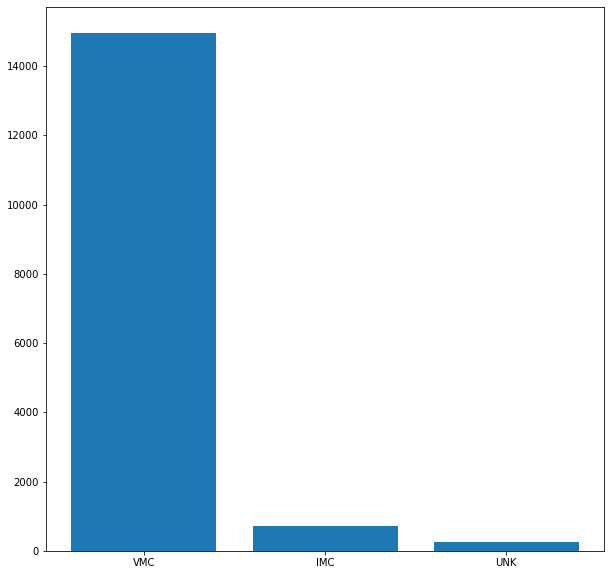

In [37]:
fig, ax = plt.subplots(figsize = (10,10))



ax.bar(x = weather_cond_val.index, height = weather_cond_val.values)

